In [9]:
!pip install ydata-profiling
!pip install plotly
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install kmodes


  Obtaining dependency information for kmodes from https://files.pythonhosted.org/packages/1a/a8/0d3bf6f3340cbcb8cf4ad02c306d157af8f09ce86aadf5346e00605870dd/kmodes-0.12.2-py2.py3-none-any.whl.metadata


In [16]:
!pip install numpy pandas ydata-profiling plotly seaborn scipy scikit-learn kmodes

# Import libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import ydata_profiling
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
color = sns.color_palette()
sns.set_style('darkgrid')

# Import libraries for statistical analysis and clustering
from scipy import stats
from scipy.stats import norm, skew
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes

# Load your data here (using the iris dataset as an example)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)


In [22]:
#Load the data
df = pd.read_csv('Mall_Customers.csv')
print("\nData length:",df.shape)
print("\nData columns:",df.columns)
print("\nData columns:",df.info())
print("\nData:\n\n",df.head())


Data length: (200, 5)

Data columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Data columns: None

Data:

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  

In [30]:
# Correlation
df_num = df.select_dtypes(include =[np.number]);
df_corr = df_num.corr()
df_corr


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [32]:
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [34]:
# Use panda profile report
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

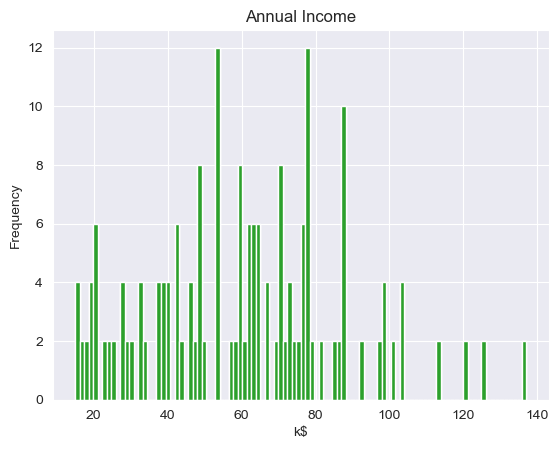

In [40]:
# Ensure plots are rendered inline in Jupyter
%matplotlib inline
# Example column for histogram (replace with your own column)
# df['Annual Income (k$)'] is just an example; replace with the correct column from your dataset
if 'Annual Income (k$)' in df.columns:
    plt.hist(df['Annual Income (k$)'], bins=100)

    # Add title and axis names
    plt.title('Annual Income')
    plt.xlabel('k$')
    plt.ylabel('Frequency')

    plt.show()
else:
    print("Column 'Annual Income (k$)' not found in the dataset")


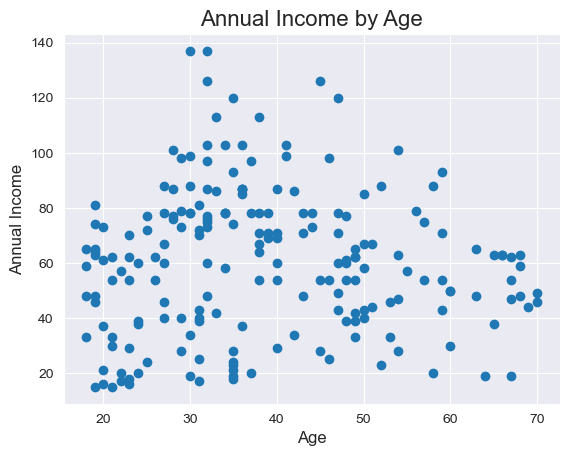

In [42]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Annual Income (k$)'])
plt.ylabel('Annual Income', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('Annual Income by Age', fontsize=16)
plt.show()


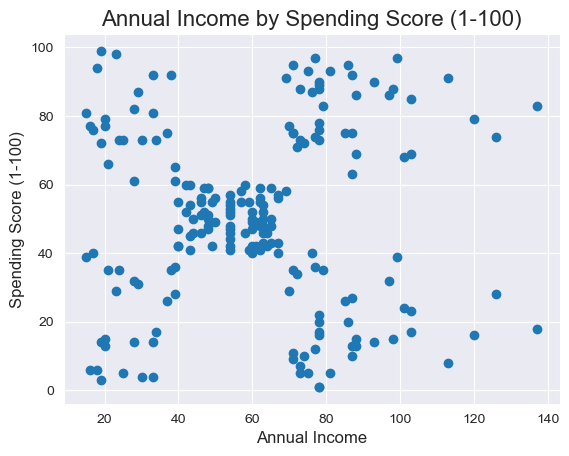

In [44]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Annual Income by Spending Score (1-100)', fontsize=16)
plt.show()

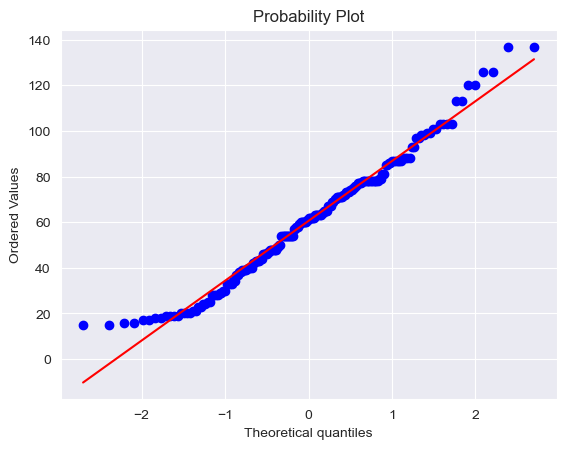

In [46]:
# QQ-plot
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(df['Annual Income (k$)'], plot=plt)
plt.show()


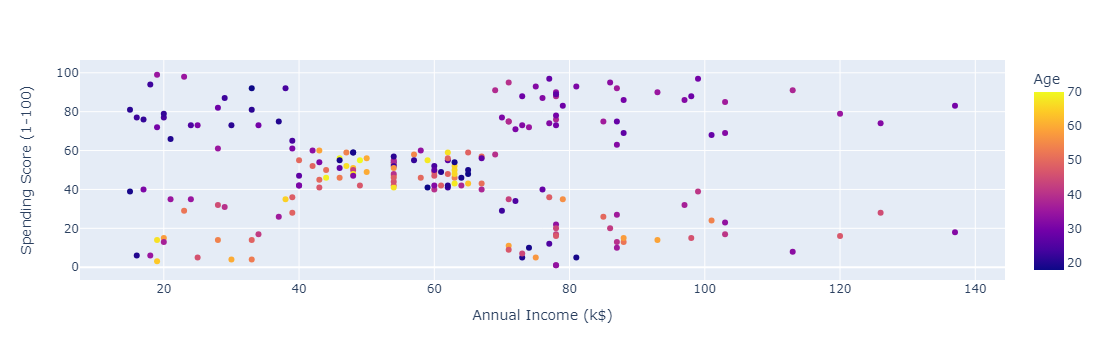

In [48]:
# Scatter Plot with color from 2nd variable
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Age')

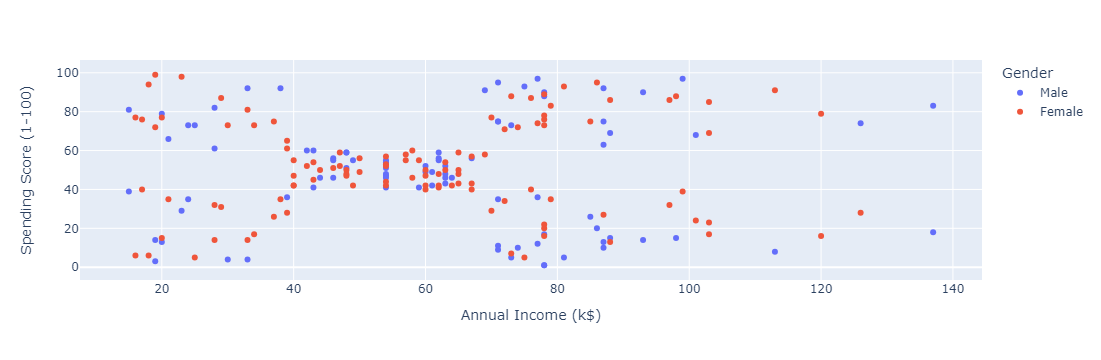

In [50]:
# Scatter Plot with color from 2nd variable
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Gender')

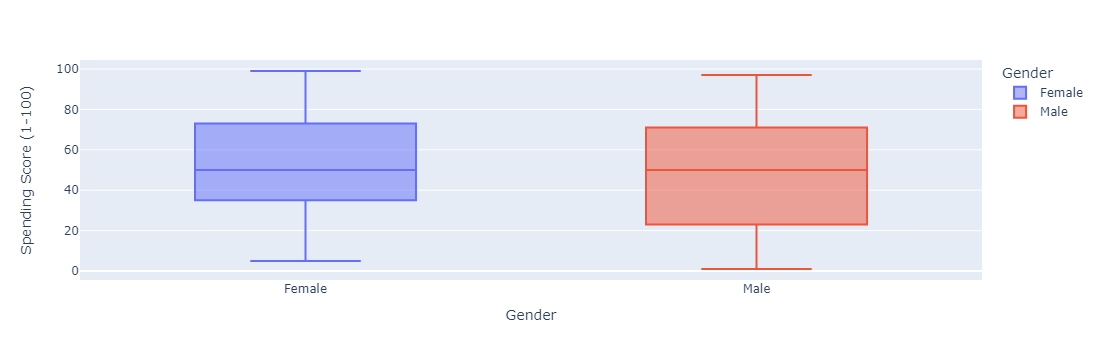

In [52]:
# Box Plot
px.box(df[['Gender', 'Spending Score (1-100)']].sort_values(by='Gender')
       , x='Gender'
       , y='Spending Score (1-100)'
       , color='Gender')


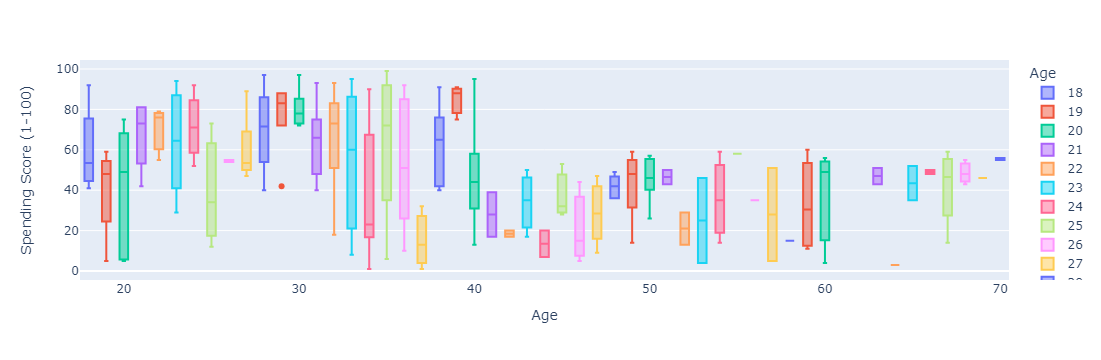

In [54]:
# Box Plot
px.box(df[['Age', 'Spending Score (1-100)']].sort_values(by='Age')
       , x='Age'
       , y='Spending Score (1-100)'
       , color='Age')

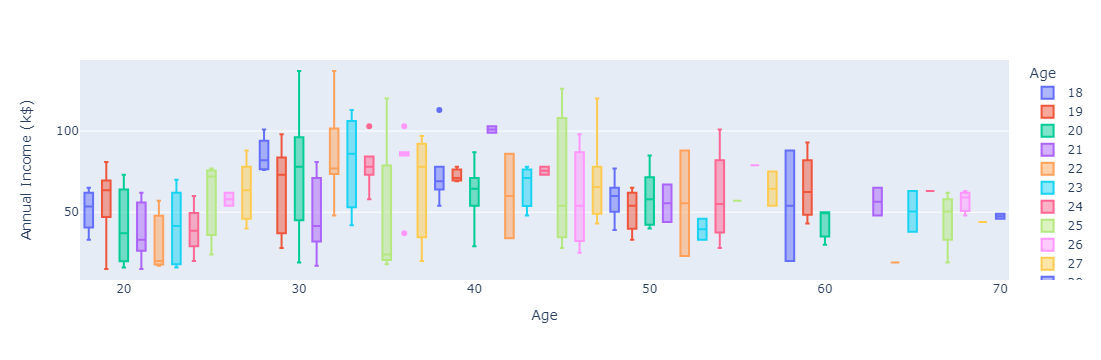

In [56]:
# Box Plot
px.box(df[['Age', 'Annual Income (k$)']].sort_values(by='Age')
       , x='Age'
       , y='Annual Income (k$)'
       , color='Age')

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



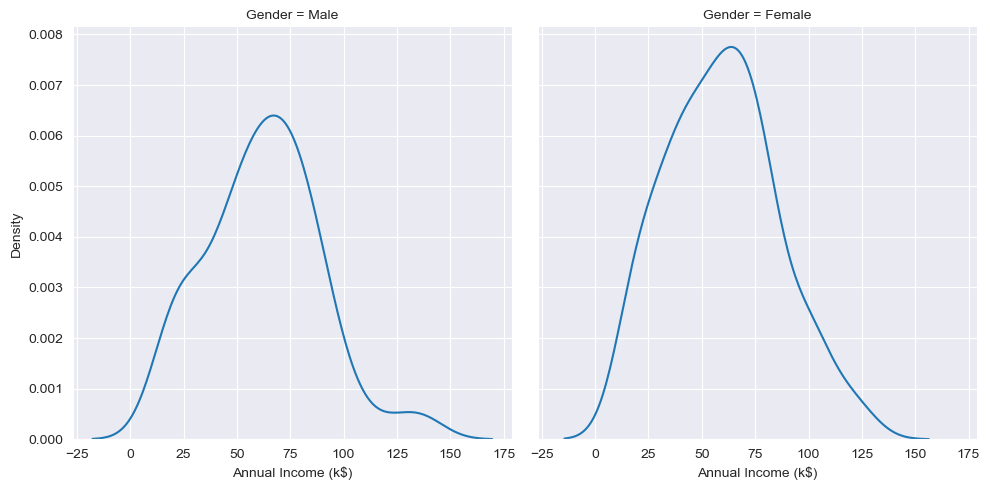

In [62]:
# Plot the distribution
sns.displot(df, x="Annual Income (k$)", col="Gender", kind="kde")

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



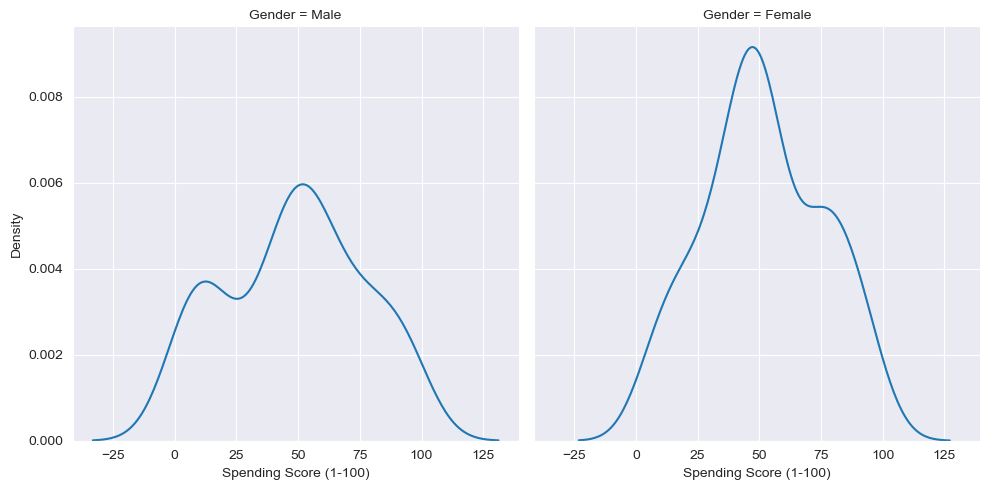

In [64]:
# Plot the distribution
sns.displot(df, x="Spending Score (1-100)", col="Gender", kind="kde")

In [66]:
# scale data
# numerical variables
var_num = ['Age', 'Spending Score (1-100)', 'Annual Income (k$)']
df_scaled = normalize(df[var_num])
df_scaled = pd.DataFrame(df_scaled, columns=var_num)

df_scaled_full = pd.concat([df_scaled, df[['Gender']]], axis=1)
print(df_scaled_full.shape)

# gower 
# df_gower = gower.gower_matrix(df_scaled_full)
# print(df_gower.shape)
# df_gower_mean = df_gower.mean(0)
# df_gower_mean = df_gower_mean.reshape(-1,1)
# print(df_gower_mean.shape)
# df_gower_mean

(200, 4)


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

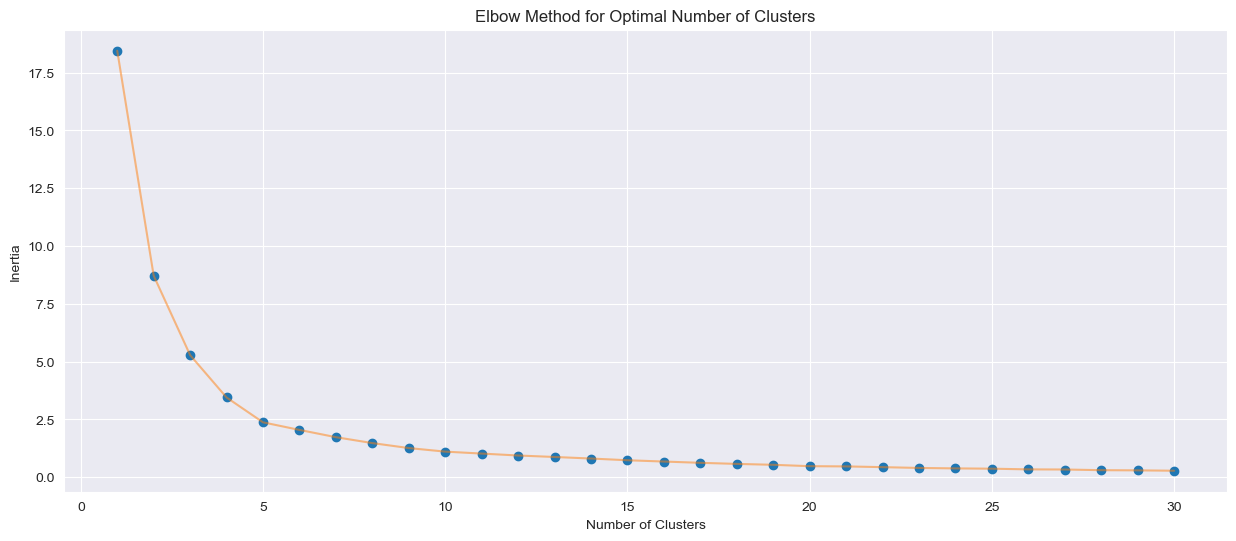

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df_scaled is already defined and preprocessed
X = df_scaled[['Age', 'Spending Score (1-100)']].values
inertia = []

k = 30

for n in range(1, k + 1):
    algorithm = KMeans(n_clusters=n,
                       init='k-means++',
                       n_init=10,  # Fixed number of initializations
                       max_iter=300,
                       tol=0.0001,
                       random_state=123)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, k + 1), inertia, 'o')
plt.plot(np.arange(1, k + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

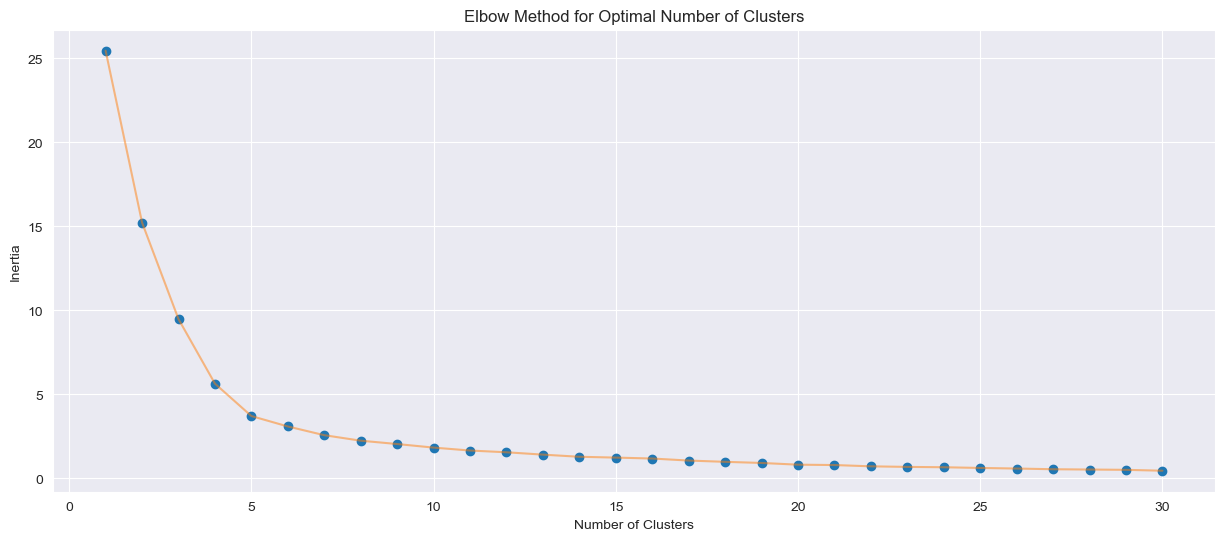

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df_scaled is already defined and preprocessed
X = df_scaled[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
inertia = []

k = 30

for n in range(1, k + 1):
    algorithm = KMeans(n_clusters=n,
                       init='k-means++',
                       n_init=10,  # Fixed number of initializations
                       max_iter=300,
                       tol=0.0001,
                       random_state=123)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, k + 1), inertia, 'o')
plt.plot(np.arange(1, k + 1), inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [76]:
from sklearn.cluster import KMeans

# Define and fit the KMeans model
k_cluster = KMeans(n_clusters=7,
                    init='k-means++',
                    n_init=10,  # Fixed number of initializations
                    max_iter=300,
                    tol=0.0001,
                    random_state=123)
k_cluster.fit(X)

# Retrieve the centroids
centroids = k_cluster.cluster_centers_

print("Centroids:")
print(centroids)


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Centroids:
[[0.41051613 0.15130872 0.88796092]
 [0.30375252 0.70404608 0.63534239]
 [0.86061468 0.17725734 0.45205768]
 [0.65520144 0.54145363 0.51381612]
 [0.29532344 0.90470066 0.28794997]
 [0.25730624 0.56654462 0.77740706]
 [0.51770309 0.51042858 0.67819896]]


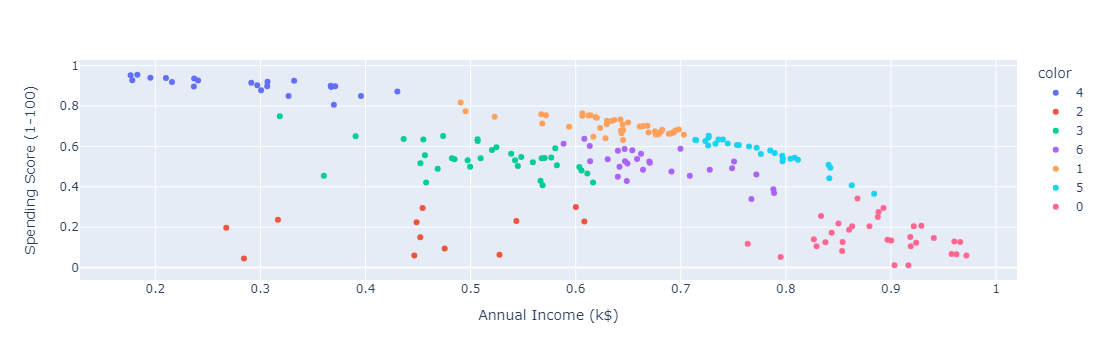

In [78]:
px.scatter(df_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', color=k_cluster.labels_.astype(str))

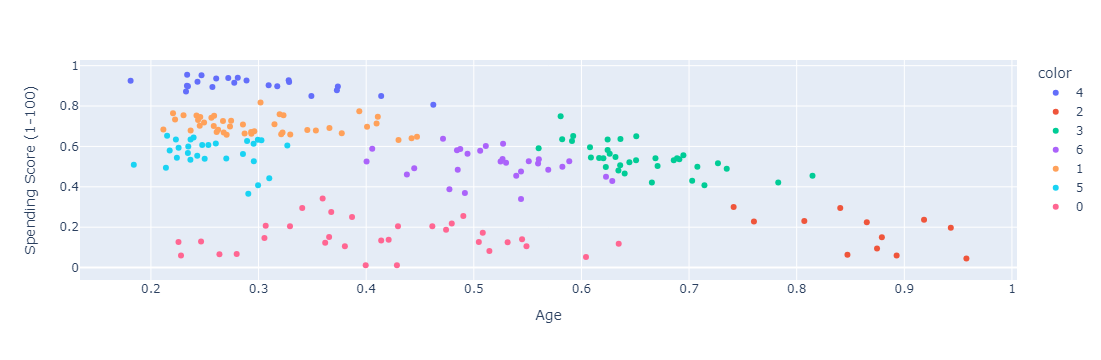

In [80]:
px.scatter(df_scaled, x='Age', y='Spending Score (1-100)', color=k_cluster.labels_.astype(str))

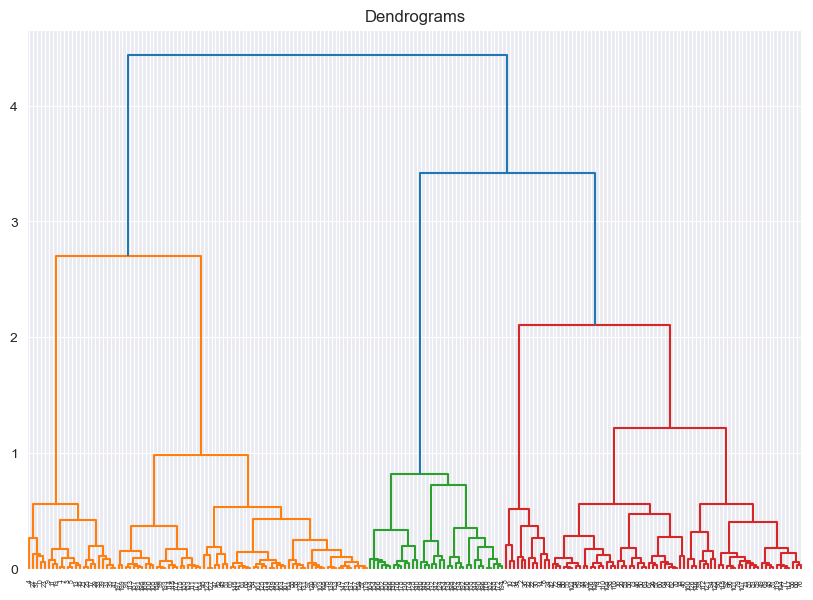

In [82]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))


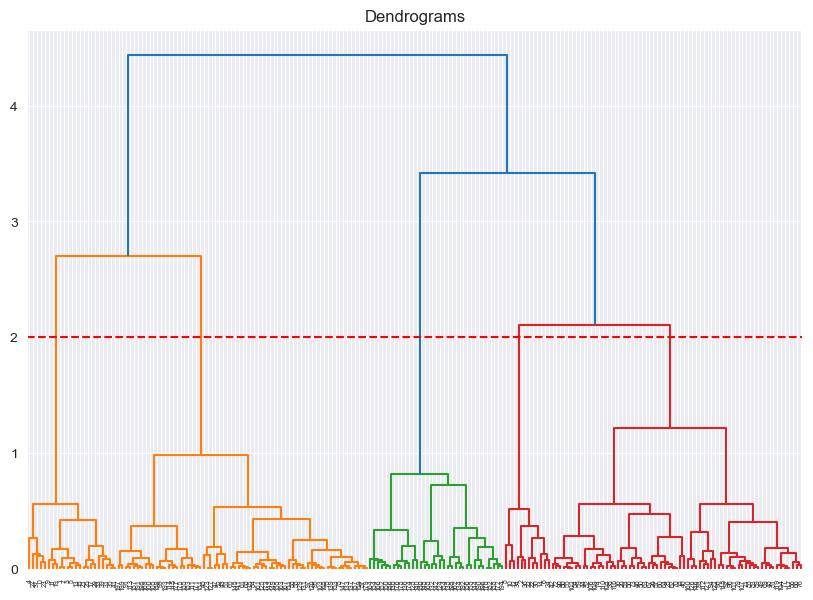

In [84]:
"""
The x-axis contains the samples and y-axis represents the distance between these samples. 
The vertical line with maximum distance is the blue line 
and hence we can decide a threshold of 2 and cut the dendrogram:
"""
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

In [90]:
from sklearn.cluster import AgglomerativeClustering

# Define and fit the AgglomerativeClustering model
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(df_scaled)

print("Cluster Labels:")
print(labels)


Cluster Labels:
[3 3 4 3 3 3 4 3 4 3 4 3 4 3 4 3 0 3 0 3 0 3 4 3 4 3 0 3 0 3 4 3 4 3 4 3 4
 3 0 3 0 3 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


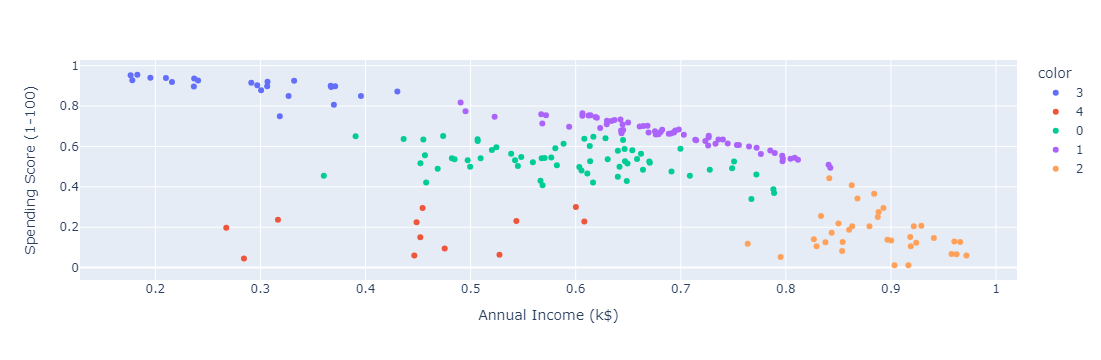

In [92]:
px.scatter(df_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', color=cluster.labels_.astype(str))

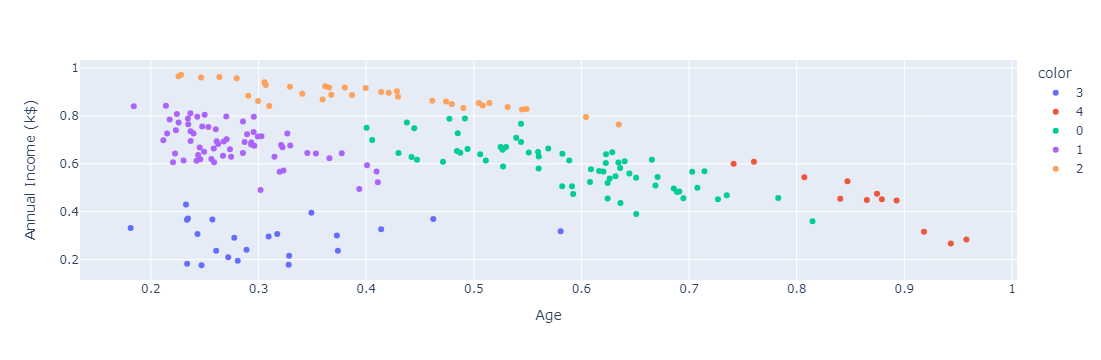

In [94]:
px.scatter(df_scaled, x='Age', y='Annual Income (k$)', color=cluster.labels_.astype(str))

In [96]:
kproto = KPrototypes(n_clusters=5, init='Cao')
df_scaled_full_dummy = pd.get_dummies(df_scaled_full, columns=["Gender"])
clusters = kproto.fit_predict(df_scaled_full_dummy, categorical=[0, 1])
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((df_scaled_full,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

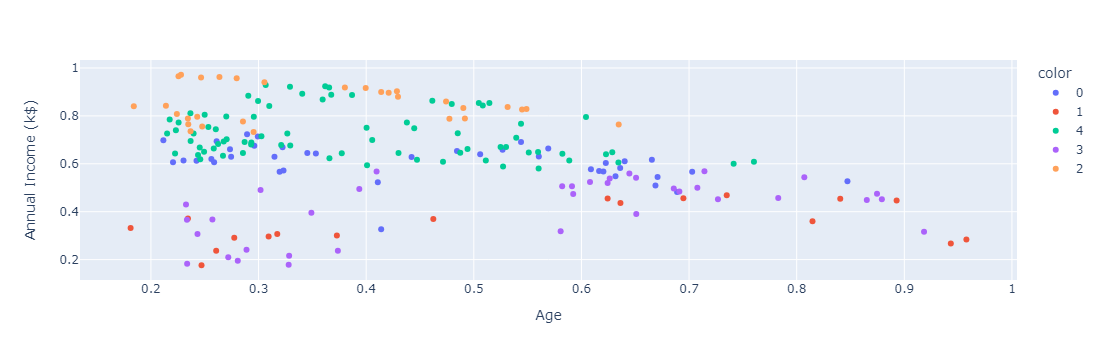

In [98]:
px.scatter(df_scaled, x='Age', y='Annual Income (k$)', color=labeledCustomers["labels"].astype(str))